In [69]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [70]:
(X_train, y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [71]:
X_train.shape

(60000, 28, 28)

In [72]:
X_train[0].shape

(28, 28)

In [74]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

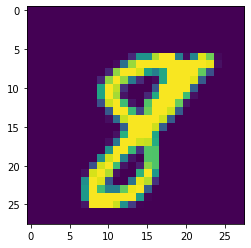

In [75]:
import matplotlib.pyplot as plt
plt.imshow(X_train[55])

In [18]:
X_train =X_train/255
X_test= X_test/255

In [20]:
X_test[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [22]:
model = Sequential()

2022-11-10 13:16:50.375690: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


**Converting 3D to 1D**

In [26]:
model.add(Flatten(input_shape=(28,28)))

Adding hidden layer. for multiple classification out **softmax** activation is best

In [54]:
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10,activation='softmax'))

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1408      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1

here **sparse_categorical_crossentropy** loss function work without label encoding. othersize **categorical_crossentropy** need one_hot encoding.
**Adam** is best optimizer

In [56]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])

In [57]:
history=model.fit(X_train,y_train, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1267 - accuracy: 0.9909 - val_loss: 0.1652 - val_accuracy: 0.9768
Epoch 2/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0115 - accuracy: 0.9981 - val_loss: 0.1882 - val_accuracy: 0.9740
Epoch 3/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0185 - accuracy: 0.9964 - val_loss: 0.1450 - val_accuracy: 0.9786
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.1779 - val_accuracy: 0.9773
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0114 - accuracy: 0.9976 - val_loss: 0.1841 - val_accuracy: 0.9732
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0116 - accuracy: 0.9978 - val_loss: 0.1806 - val_accuracy: 0.9751
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0134 - accuracy: 0.9975 - val_loss: 0.1844 - val_accuracy:

In [62]:
y_pred = model.predict(X_test)

In [63]:
y_pred=y_pred.argmax(axis=1)

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9747

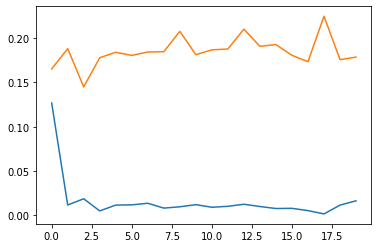

In [66]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

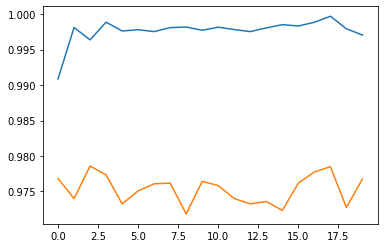

In [67]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [77]:
X_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 